# Questão 4.

Utilize a rede neural perceptron de múltiplas camadas do tipo NARX (rede recorrente)
para fazer a predição de um passo x^(n+1) da série temporal:

$x(n) = \sqrt{1+sin(n+sin^2(n))}, n = 0, 1, 2, 3 ...$. Gere inicialmente um conjunto de amostras para
o treinamento e um conjunto de amostras de teste. Avalie o desempenho mostrando a curva
a série temporal, a curva de predição e a curva do erro de predição definido como
$e(n+1)=x(n+1)-x^(n+1)$.

Sugestão para solução:
Vetor de entrada da rede neural $x(n)=[x(n), x(n-1), x(n-2), x(n-3)]^t$, corresponde uma rede
com 4 dados de entrada. Um neurônio na saída gerando a estimativa x^(n+1). Observe que
a reposta desejada é x(n+1) obtida diretamente da série temporal.

## Imports das bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

## Funções auxiliares e separação dos dados de treino e teste

In [12]:
def gerar_serie(n_points):
    return np.sqrt(1 + np.sin(np.arange(n_points) + np.sin(np.arange(n_points)**2)))

# Preparar o dataset
def preparar_dataset(series, input_size):
    X, y = [], []
    for i in range(input_size, len(series)):
        X.append(series[i - input_size:i])
        y.append(series[i])
    return np.array(X), np.array(y)

# Pametros
n_points = 1000
# Pontos anteriores a um ponto n
input_size = 4

train_size = 0.8

# Generate series and prepare datasets
series = gerar_serie(n_points)
X, y = preparar_dataset(series, input_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=False)

## Definição do modelo NARX

In [ ]:
model = Sequential([
    Input(shape=(input_size,)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)  # Single output for the next prediction
])

model.compile(optimizer='adam', loss='mse')


## Treino do modelo, previsões e plots

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


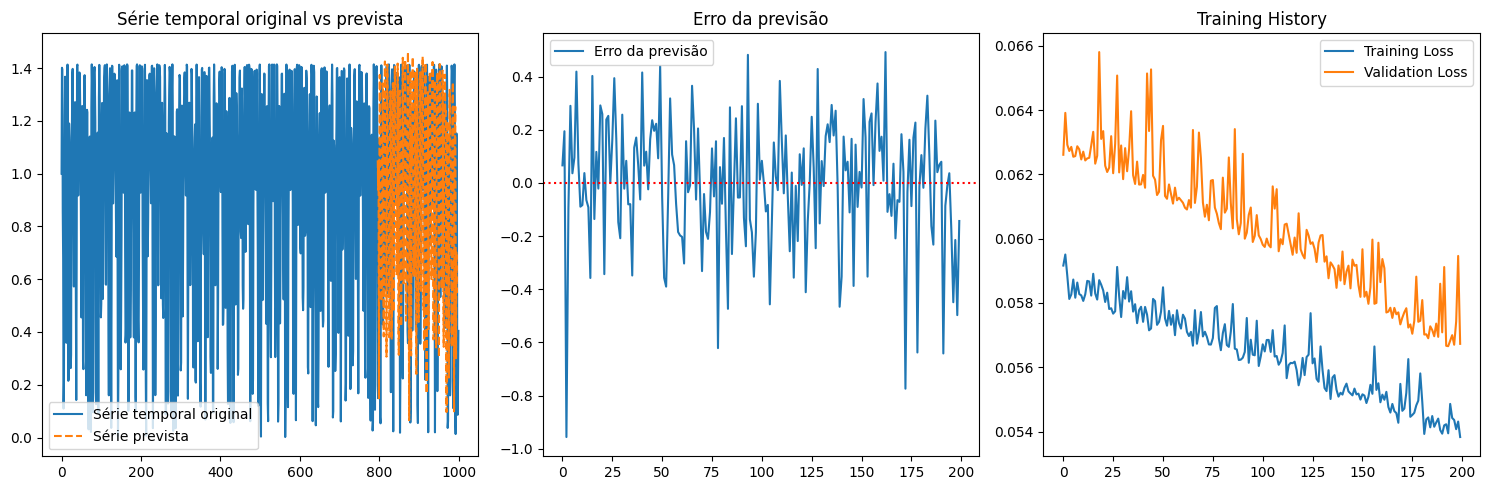

In [13]:
# Treina o modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=0)

y_pred = model.predict(X_test)

# Calcula o erro
e_pred = y_test - y_pred.flatten()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(len(series)), series, label='Série temporal original')
plt.plot(range(len(X_train), len(X_train) + len(y_test)), y_pred, label='Série prevista', linestyle='dashed')
plt.legend()
plt.title('Série temporal original vs prevista')

# Prediction Error
plt.subplot(1, 3, 2)
plt.plot(range(len(e_pred)), e_pred, label='Erro da previsão')
plt.axhline(0, color='red', linestyle='dotted')
plt.legend()
plt.title('Erro da previsão')

# Training History
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training History')

plt.tight_layout()
plt.show()